In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
%matplotlib inline

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601)

# data (as pandas dataframes)
X = ai4i_2020_predictive_maintenance_dataset.data.features
y = ai4i_2020_predictive_maintenance_dataset.data.targets

# metadata
print(ai4i_2020_predictive_maintenance_dataset.metadata)

# variable information
print(ai4i_2020_predictive_maintenance_dataset.variables)


{'uci_id': 601, 'name': 'AI4I 2020 Predictive Maintenance Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/601/data.csv', 'abstract': 'The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression', 'Causal-Discovery'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 10000, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], 'index_col': ['UID', 'Product ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5HS5C', 'creators': [], 'intro_paper': {'title': 'Explainable Artificial Intelligence for Predictive Maintenance

In [ ]:
X.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9


In [ ]:
X = X.drop(['Type'], axis=1)

In [ ]:
X.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9


In [ ]:
y.head()

,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [ ]:
# Split the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y['Machine failure'], test_size=0.4, random_state=1234)

In [ ]:
model = LogisticRegression(random_state = 16)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.968
Precision: 0.984
Recall: 0.511
F1 score: 0.514


<Axes: >

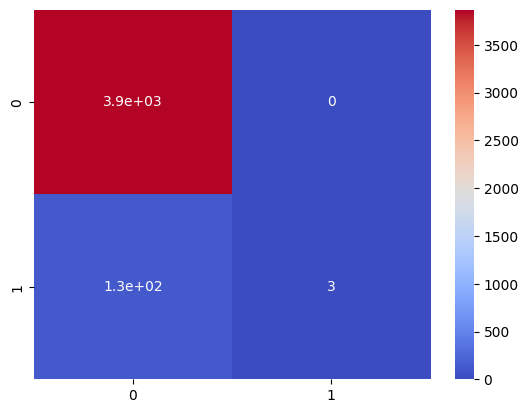

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

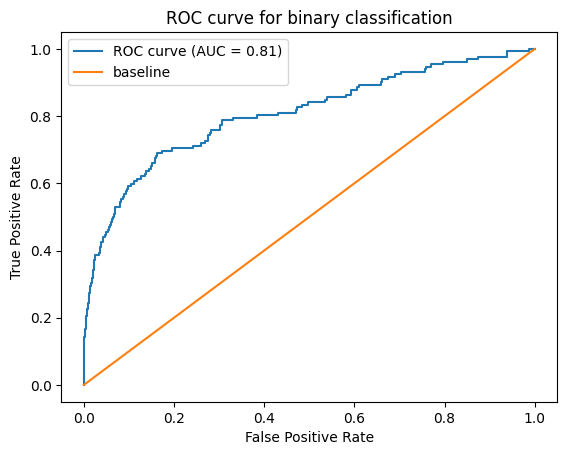

In [ ]:
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(X_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()